In [49]:
import json

with open('../../data/lyrics.json', 'r', encoding='utf8') as f:
    dataset = json.load(f)


print(len(dataset))

5992


In [50]:
with open('../../data/categories.json', 'r', encoding='utf8') as f:
    categories = json.load(f)

for key, items in sorted(categories.items(), key=lambda x: len(x[1]), reverse=True):
    print(f"{key} {len(items)}")



Frauenfeindlichkeit 19
Gewalt 17
Antisemitismus 14
Homophobie 14
Behindertenfeindlichkeit 13
Trauer 12
Liebe 10
Rassismus 6


In [51]:
from collections import Counter

albums = []
artists = []
artist_names = []
no_artist_names = 0

for song in dataset:
    albums.append(song['album'])
    if song['artist_name']:
        artist_names.append(song['artist_name'])
    else:
        no_artist_names += 1
    for artist in song['writer_artists']:
        artists.append(artist)

albums = Counter(albums).most_common()
artists = Counter(artists).most_common()
artist_names = Counter(artist_names).most_common()

print(artists[:5])
print(albums[:5])
print(artist_names[:5])
print(no_artist_names)

print(len(set(artist_names)))
print(len(albums))
print(len(artists))


[('David Kraft', 68), ('Tim Wilke', 68), ('Sido', 65), ('Miksu', 65), ('Djorkaeff', 62)]
[('<single>', 888), ('Liebeskummerparty', 16), ('Instinkt', 15), ('Berlins Most Wanted', 15), ('Blauer Samt', 14)]
[('Ferris MC', 16), ('Beatfabrik', 16), ('Blumentopf', 16), ('MoTrip', 16), ('Marteria', 16)]
3684
213
1711
2094


5983
5983
[[ 1.         -0.13071608]
 [-0.13071608  1.        ]]
[[ 1.         -0.07441113]
 [-0.07441113  1.        ]]


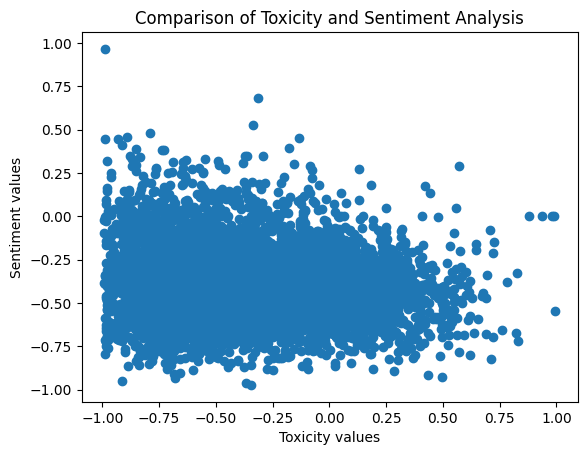

In [52]:
# Histograms for sentiment and toxicity

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

sentiment_histogram = []
toxicity_histogram = []
sentiment_histogram_binary = []
toxicity_histogram_binary = []

for song in dataset:
    if song['sentiment_value'] is not None:
        sentiment_histogram.append(song['sentiment_value'])
        if song['sentiment_value'] > 0:
            sentiment_histogram_binary.append(1)
        else:
            sentiment_histogram_binary.append(-1)
    if song['toxicity_value'] is not None:
        toxicity_histogram.append(song['toxicity_value'])
        if song['toxicity_value'] > 0:
            toxicity_histogram_binary.append(1)
        else:
            toxicity_histogram_binary.append(-1)

# check if both lists are equal
print(len(toxicity_histogram))
print(len(sentiment_histogram))



r = np.corrcoef(toxicity_histogram, sentiment_histogram)
print(r)

r2 = np.corrcoef(toxicity_histogram_binary, sentiment_histogram_binary)
print(r2)

plt.scatter(toxicity_histogram, sentiment_histogram)
plt.xlabel('Toxicity values')
plt.ylabel("Sentiment values")
plt.title('Comparison of Toxicity and Sentiment Analysis')

plt.show()


In [53]:
print(np.median(sentiment_histogram))
print(np.quantile(sentiment_histogram, 0.25))
print(np.quantile(sentiment_histogram, 0.75))

print(len([x for x in sentiment_histogram if x > 0]))
print(len(sentiment_histogram))


-0.4013998887755654
-0.5230865979736501
-0.27162173403693096
263
5983


In [54]:
print(np.median(toxicity_histogram))
print(np.quantile(toxicity_histogram, 0.25))
print(np.quantile(toxicity_histogram, 0.75))

print(len([x for x in toxicity_histogram if x > 0]))
print(len(toxicity_histogram))

print(len([x for x in toxicity_histogram if x < -0.9]))


-0.34842554444358464
-0.6000256461627556
-0.08263202186288504
1100
5983
182


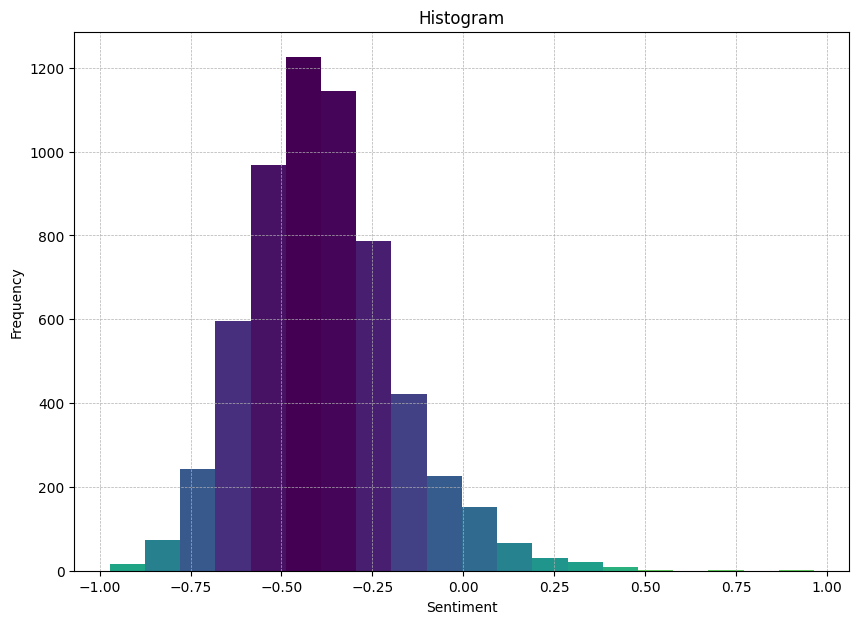

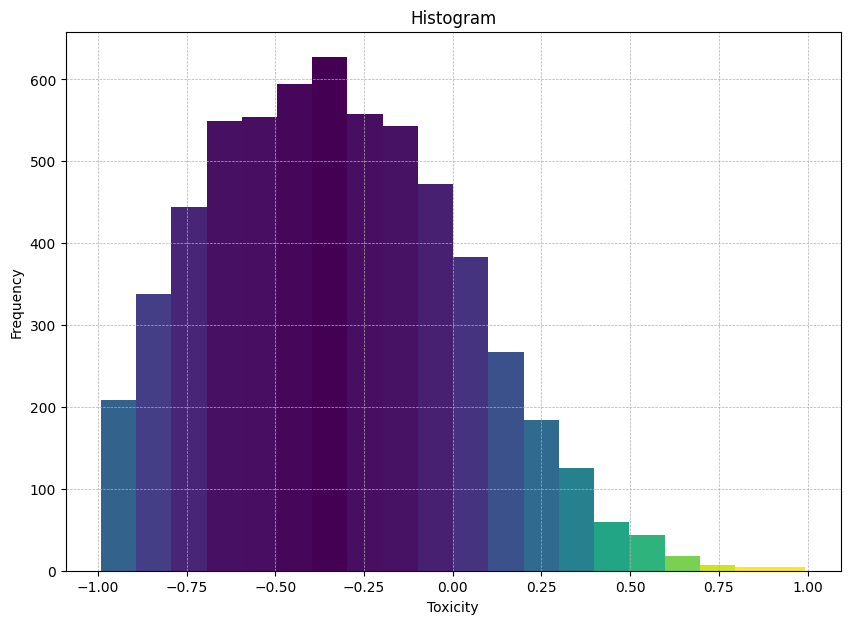

In [55]:

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

def histogram_plot(data, filename, label):



    # Creating histogram
    fig, ax = plt.subplots(figsize =(10, 7))

    # Creating histogram
    N, bins, patches = ax.hist(data, bins = 20)

    # Setting color
    fracs = ((N**(1 / 5)) / N.max())
    norm = colors.Normalize(fracs.min(), fracs.max())

    for thisfrac, thispatch in zip(fracs, patches):
        color = plt.cm.viridis(1-norm(thisfrac))
        thispatch.set_facecolor(color)

    # Adding extra features
    plt.xlabel(label)
    plt.ylabel("Frequency")
    plt.title('Histogram')
    plt.grid(linestyle = '--', linewidth = 0.5)

    # Show plot
    # plt.show()
    plt.savefig(filename + '.png')

histogram_plot(np.array(sentiment_histogram), '../../data/sentiment_histogram', 'Sentiment')
histogram_plot(np.array(toxicity_histogram), '../../data/toxicity_histogram', 'Toxicity')


In [56]:
def print_values(values, name):
    # mean
    mean = np.mean(values)
    # median
    median = np.median(values)
    # 0.25 quantile
    q_25 = np.quantile(values, 0.25)
    # 0.75 quantile
    q_75 = np.quantile(values, 0.75)
    # standard deviation
    std = np.std(values)

    print(f"Statistical Metrics for {name}: Mean = {mean}, Median = {median}, 25%-Quantile = {q_25}, 75%-Quantile = {q_75}, Standard deviation = {std}")

print_values(sentiment_histogram, 'Sentiment')
print_values(toxicity_histogram, 'Toxicity')

Statistical Metrics for Sentiment: Mean = -0.3865343225905885, Median = -0.4013998887755654, 25%-Quantile = -0.5230865979736501, 75%-Quantile = -0.27162173403693096, Standard deviation = 0.2037442931718223
Statistical Metrics for Toxicity: Mean = -0.3282731761483918, Median = -0.34842554444358464, 25%-Quantile = -0.6000256461627556, 75%-Quantile = -0.08263202186288504, Standard deviation = 0.348997016657076


In [57]:
from Pipeline.Analysis.CheckOccurences import categories
import pandas as pd
from collections import defaultdict


def get_year_bin(temp_year):
    year_bins = list(range(2000, 2024, 4))
    for y in year_bins:
        if abs(int(temp_year)-y) < 3:
            return y


def sum_occurences_over_time():
    columns = [str(i) for i in range(1998, 2024)]
    index = list(categories.categories.keys()) + ['number_of_songs']
    results_occurrences = pd.DataFrame(0,
                           index=index,
                           columns=columns)

    results_sentiment = {year: [] for year in columns}
    results_toxicity = {year: [] for year in columns}
    class_score_dict = {year: defaultdict(int) for year in list(range(2000, 2024, 4))}
    year_counter = {year: 0 for year in list(range(2000, 2024, 4))}


    for song_temp in dataset:
        if song_temp['release_date'] not in [None, "unidentified"]:
            year = song_temp['release_date'][0:4]
            if year in columns:
                if song_temp['sentiment_value'] is not None:
                    results_sentiment[year].append(song_temp['sentiment_value'])
                if song_temp['toxicity_value'] is not None:
                    results_toxicity[year].append(song_temp['toxicity_value'])
                if song_temp['total_class_score'] is not None:
                    year_counter[get_year_bin(year)] += 1
                    for key, value in song_temp['total_class_score'].items():
                        class_score_dict[get_year_bin(year)][key] += value

                results_occurrences.at['number_of_songs', year] += 1
            for category, matched_word_dict in song_temp['matched_categories'].items():
                if year in columns:
                    results_occurrences.at[category, year] = results_occurrences.at[category, year] + \
                                                 sum([count for word, count in matched_word_dict.items()])

    for year in columns:
        for category, _ in categories.categories.items():
            if results_occurrences.at['number_of_songs', year] != 0:
                results_occurrences.at[category, year] = \
                    round(float(results_occurrences.at[category, year]) / float(results_occurrences.at['number_of_songs', year]), 2)
            else:
                results_occurrences.at[category, year] = 0

    return results_occurrences, results_sentiment, results_toxicity, class_score_dict, year_counter


results_occurences, results_sentiment, results_toxicity, class_score_dict_final, year_counter = sum_occurences_over_time()

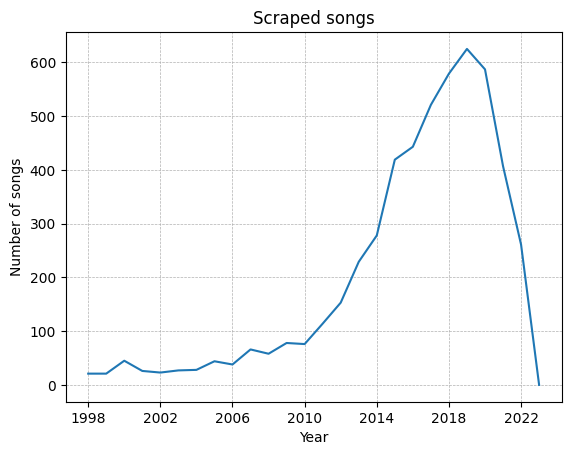

In [58]:

ticks = [str(num) for num in range(1998, 2023, 4)]

plt.plot(results_occurences.loc['number_of_songs'])
plt.xlabel("Year")  # add X-axis label
plt.ylabel("Number of songs")  # add Y-axis label
plt.title("Scraped songs")  # add title
plt.xticks(ticks)
plt.grid(linestyle = '--', linewidth = 0.5)

plt.savefig('../../data/number_of_songs'+ '.png')

plt.show()

In [59]:
results_sentiment

{'1998': [-0.17979792687628005,
  -0.26309873163700104,
  -0.4096386040511884,
  -0.5471476757008097,
  -0.27045616172254083,
  -0.5515440684192034,
  -0.3419092963139216,
  -0.795497182824395,
  -0.357010548820301,
  -0.28186825414498645,
  -0.5452099754696801,
  0.45948957261585055,
  -0.3604675456881523,
  -0.31333801664155103,
  -0.2876472556963563,
  -0.510880587277589,
  -0.6970145872661045,
  -0.32970236028943745,
  -0.4917970269918442,
  -0.11717172622680665,
  -0.3951802589954474],
 '1999': [-0.29544631326407716,
  -0.2812033794647039,
  -0.5343011915683746,
  -0.326773039996624,
  -0.28552423512682,
  -0.43432436971103444,
  -0.5877403739620658,
  -0.2916738986968994,
  0.023335704436668984,
  -0.44877961874008176,
  -0.5034393354466087,
  -0.5894343544136394,
  -0.33490859358399,
  -0.25741768221963535,
  -0.5456355776426927,
  -0.5115116008541041,
  -0.38843342661857605,
  -0.20695268213748932,
  -0.3411898696145346,
  -0.29345674387046267,
  -0.6060496419668198],
 '2000': 

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
q_25,-0.510881,-0.511512,-0.485057,-0.455357,-0.440849,-0.482234,-0.533947,-0.553878,-0.473962,-0.562037,-0.567509,-0.545683,-0.538146,-0.540513,-0.482768,-0.506983,-0.527264,-0.507008,-0.522196,-0.521519,-0.508263,-0.524306,-0.549686,-0.548998,-0.537921
median,-0.357011,-0.34119,-0.37406,-0.364325,-0.356176,-0.305153,-0.435641,-0.376038,-0.364538,-0.436755,-0.426581,-0.470844,-0.417144,-0.425969,-0.38886,-0.400405,-0.406743,-0.395265,-0.406928,-0.401853,-0.39171,-0.397763,-0.411039,-0.428665,-0.423131
q_75,-0.281868,-0.291674,-0.276908,-0.259618,-0.18718,-0.238919,-0.32217,-0.298263,-0.241795,-0.302995,-0.342101,-0.341166,-0.338868,-0.276043,-0.263297,-0.299576,-0.270087,-0.272741,-0.271708,-0.266226,-0.255919,-0.258006,-0.286917,-0.28334,-0.280201


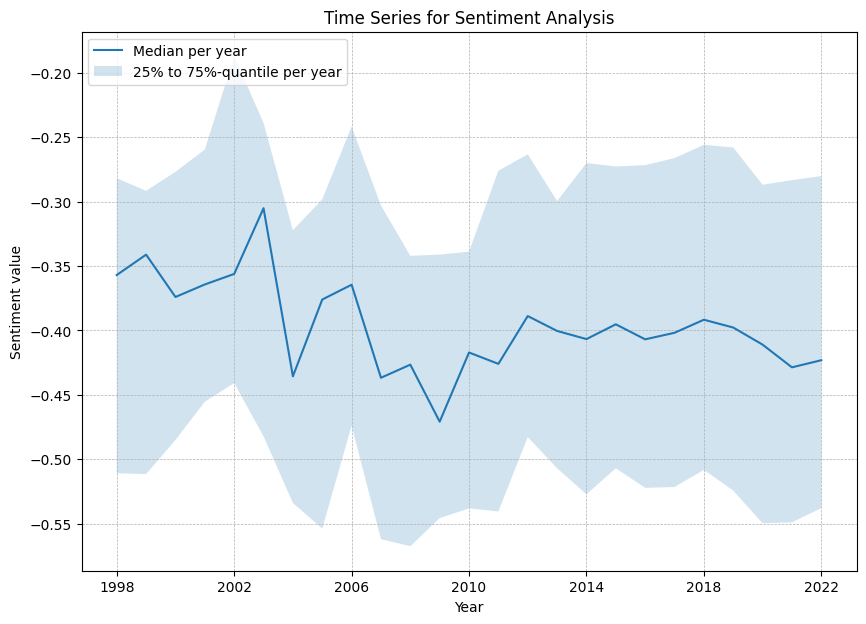

In [60]:

columns = [str(i) for i in range(1998, 2023)]
ticks = [num for num in range(1998, 2023, 4)]

index = ["q_25", "median", "q_75"]
quantiles_sentiment = pd.DataFrame(
                       index=index,
                       columns=columns)

for year, values in results_sentiment.items():
    if(len(values) > 0):
        # median
        median = np.median(values)
        # 0.25 quantile
        q_25 = np.quantile(values, 0.25)
        # 0.75 quantile
        q_75 = np.quantile(values, 0.75)

        quantiles_sentiment.at['median', year] = median
        quantiles_sentiment.at['q_25', year] = q_25
        quantiles_sentiment.at['q_75', year] = q_75

pd.set_option('display.max_columns', 500)
display(quantiles_sentiment)

median = np.array(quantiles_sentiment.loc['median'], dtype=float)
# Creating histogram
fig, ax = plt.subplots(1,1,figsize =(10, 7))
ax.plot(list(range(1998, 2023)), median, label='Median per year')
ax.fill_between(list(range(1998, 2023)),
                np.array(quantiles_sentiment.loc['q_25'], dtype=float),
                np.array(quantiles_sentiment.loc['q_75'], dtype=float), alpha=0.2, label='25% to 75%-quantile per year')

ax.legend(loc='upper left')



plt.xlabel("Year")  # add X-axis label
plt.ylabel("Sentiment value")  # add Y-axis label
plt.title("Time Series for Sentiment Analysis")  # add title
plt.xticks(ticks)
plt.grid(linestyle = '--', linewidth = 0.5)


plt.savefig('../../data/time_series_sentiment'+ '.png')

plt.show()


,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
q_25,-0.615805,-0.197654,-0.282305,-0.507835,-0.569823,-0.27906,-0.557244,-0.53206,-0.571071,-0.453043,-0.602707,-0.552826,-0.476428,-0.451088,-0.58993,-0.465716,-0.555469,-0.565443,-0.58425,-0.573391,-0.555312,-0.627855,-0.650607,-0.641374,-0.631712
median,-0.410458,0.024505,-0.011506,-0.272658,-0.377792,-0.142296,-0.378978,-0.186994,-0.280839,-0.217728,-0.292715,-0.278159,-0.211652,-0.201933,-0.292673,-0.291852,-0.24129,-0.301844,-0.290775,-0.31814,-0.349315,-0.392941,-0.438803,-0.428398,-0.442839
q_75,0.045847,0.120011,0.172687,0.084483,-0.093329,0.033995,-0.272569,-0.005564,0.021942,-0.025417,-0.04008,-0.057521,-0.040134,0.07535,0.010401,-0.037477,-0.011873,-0.038378,-0.023003,-0.044815,-0.0838,-0.148424,-0.22059,-0.187085,-0.192073


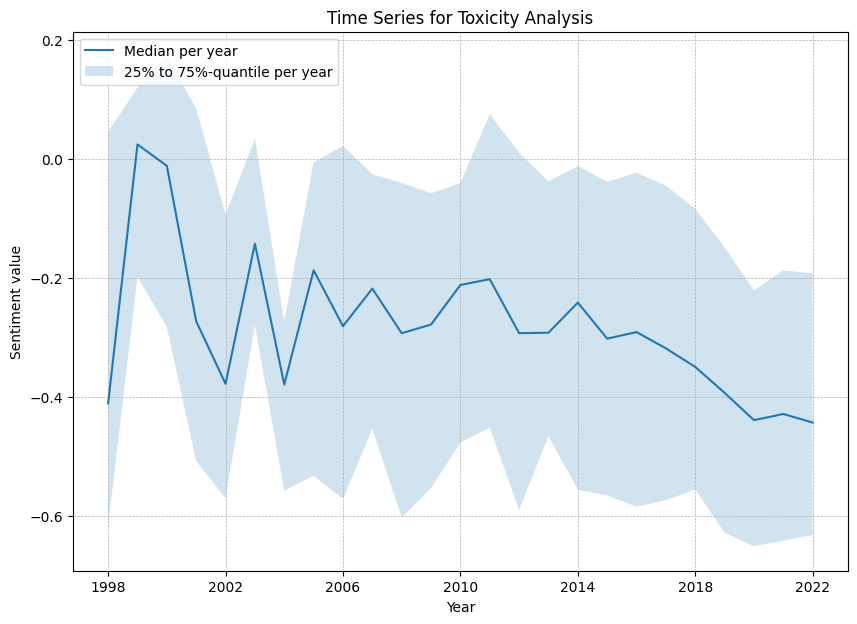

In [61]:
columns = [str(i) for i in range(1998, 2023)]
ticks = [num for num in range(1998, 2023, 4)]

index = ["q_25", "median", "q_75"]
quantiles_sentiment = pd.DataFrame(
                       index=index,
                       columns=columns)

for year, values in results_toxicity.items():
    if(len(values) > 0):
        # median
        median = np.median(values)
        # 0.25 quantile
        q_25 = np.quantile(values, 0.25)
        # 0.75 quantile
        q_75 = np.quantile(values, 0.75)

        quantiles_sentiment.at['median', year] = median
        quantiles_sentiment.at['q_25', year] = q_25
        quantiles_sentiment.at['q_75', year] = q_75


display(quantiles_sentiment)

median = np.array(quantiles_sentiment.loc['median'], dtype=float)
# Creating histogram
fig, ax = plt.subplots(1,1,figsize =(10, 7))
ax.plot(list(range(1998, 2023)),median, label='Median per year')
ax.fill_between(list(range(1998, 2023)),
                np.array(quantiles_sentiment.loc['q_25'], dtype=float),
                np.array(quantiles_sentiment.loc['q_75'], dtype=float), alpha=0.2, label='25% to 75%-quantile per year')

ax.legend(loc='upper left')



plt.xlabel("Year")  # add X-axis label
plt.ylabel("Sentiment value")  # add Y-axis label
plt.title("Time Series for Toxicity Analysis")  # add title
plt.xticks(ticks)
plt.grid(linestyle = '--', linewidth = 0.5)



plt.savefig('../../data/time_series_toxicity'+ '.png')
plt.show()

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Antisemitismus,0.00,0.05,0.02,0.08,0.09,0.00,0.04,0.09,0.03,0.08,0.03,0.01,0.07,0.05,0.04,0.03,0.06,0.06,0.04,0.03,0.07,0.04,0.01,0.03,0.02,0
Behindertenfeindlichkeit,0.10,0.05,0.33,0.08,0.52,0.11,0.18,0.07,0.32,0.12,0.29,0.28,0.17,0.25,0.12,0.19,0.19,0.13,0.09,0.08,0.04,0.05,0.03,0.05,0.03,0
Frauenfeindlichkeit,0.81,0.86,3.11,3.38,2.57,8.11,2.07,5.39,2.37,2.70,1.26,2.12,2.96,2.22,1.63,1.78,1.94,1.69,1.85,1.65,1.50,1.45,1.23,1.12,0.82,0
Gewalt,0.86,1.19,1.67,2.04,1.65,2.63,1.86,3.48,2.84,3.11,1.74,2.86,2.62,2.67,1.70,1.86,2.08,1.93,2.16,1.88,1.63,1.46,1.58,1.45,1.46,0
Homophobie,0.05,0.10,0.56,0.73,0.17,0.37,0.25,0.34,1.05,0.68,0.26,0.55,0.33,0.29,0.23,0.27,0.28,0.24,0.19,0.18,0.23,0.17,0.14,0.14,0.07,0
Liebe,3.57,2.33,1.58,2.54,2.22,1.41,2.46,2.73,3.97,1.85,2.07,2.03,1.93,2.50,2.09,2.52,2.05,1.93,1.89,1.96,1.99,1.96,2.13,1.97,1.85,0
Rassismus,0.24,0.43,0.87,0.77,0.13,1.30,0.46,0.18,0.26,0.38,0.09,0.38,0.33,0.25,0.51,0.34,0.30,0.24,0.43,0.29,0.33,0.29,0.41,0.34,0.31,0
Trauer,0.19,0.38,0.27,0.31,0.22,0.22,0.25,0.20,0.26,0.17,0.40,0.32,0.25,0.31,0.21,0.21,0.22,0.21,0.20,0.15,0.16,0.23,0.24,0.21,0.16,0


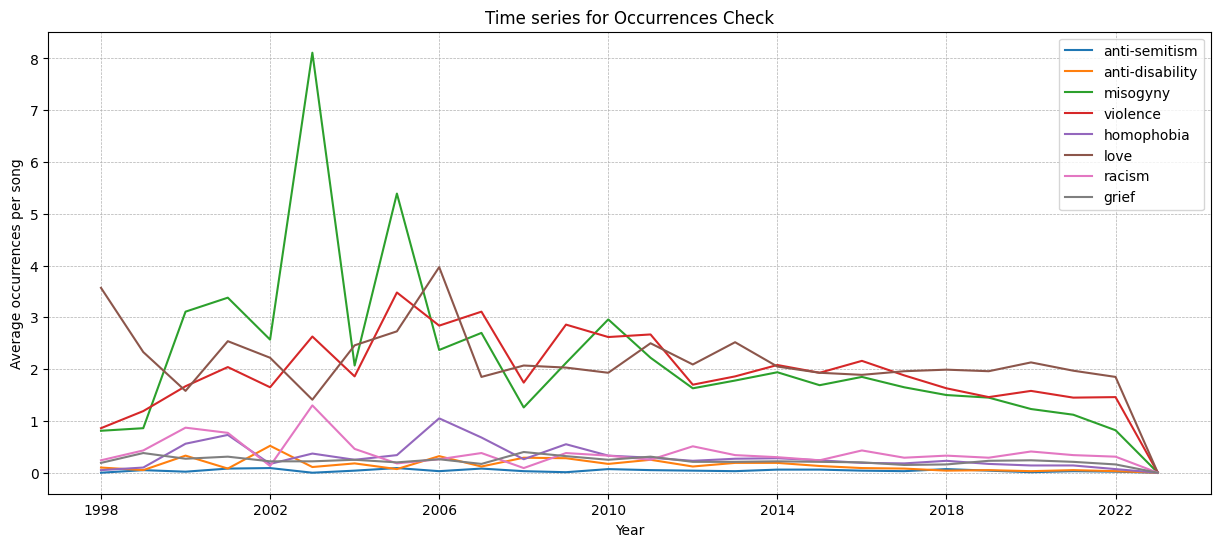

In [62]:
# TODO: Time series for occurrences

try:
    results_occurences = results_occurences.drop('number_of_songs')
except:
    print('Exception')

display(results_occurences)

ticks = [str(num) for num in range(1998, 2023, 4)]

fig, ax = plt.subplots(1,1, figsize =(15, 6))
ax.plot(results_occurences.transpose())
plt.xlabel("Year")  # add X-axis label
plt.ylabel("Average occurrences per song")  # add Y-axis label

plt.grid(linestyle = '--', linewidth = 0.5)
plt.xticks(ticks)
plt.title('Time series for Occurrences Check')
ax.legend(["anti-semitism", "anti-disability", "misogyny", "violence", "homophobia", "love", "racism", "grief"])
plt.savefig('../../data/time_series_occurrences'+ '.png')

plt.show()


# TODO: Time series for zero shot

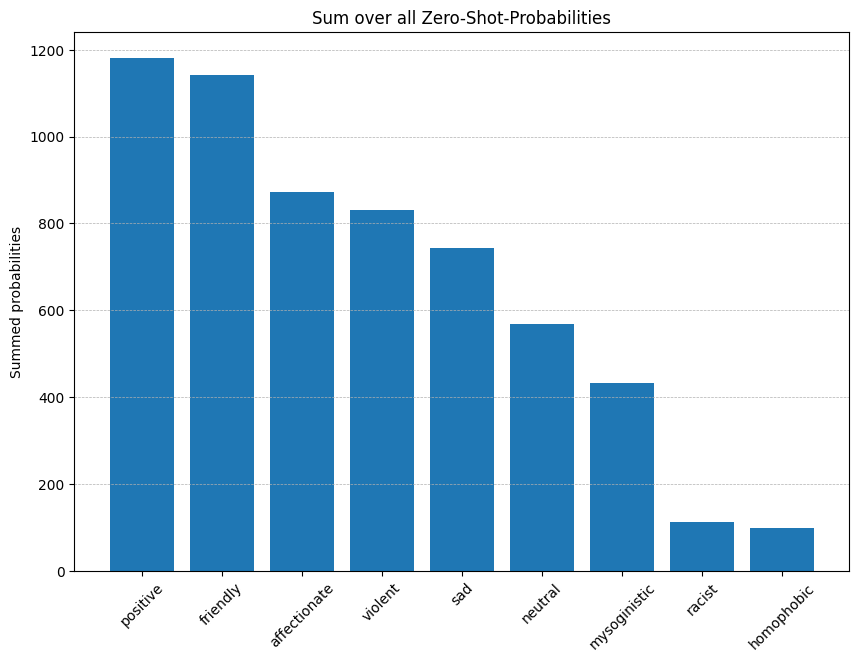

In [63]:
from collections import defaultdict

class_score_dict = defaultdict(int)

zero_shot_mapper = {
    "positiv" : "positive",
    "freundlich": "friendly",
    "liebevoll": "affectionate",
    "gewalttätig": "violent",
    "traurig": "sad",
    "neutral": "neutral",
    "frauenfeindlich": "mysoginistic",
    "rassistisch": "racist",
    "homophob": "homophobic"
}

for song_temp in dataset:
    if song_temp['total_class_score'] is not None:
        for key, value in song_temp['total_class_score'].items():
            class_score_dict[key] += value

class_score_dict = {k: v for k, v in sorted(class_score_dict.items(), key=lambda item: item[1], reverse=True)}


fig, ax = plt.subplots(1,1, figsize =(10, 7))
ax.bar(range(len(class_score_dict)), class_score_dict.values(), tick_label=list(map(lambda x: zero_shot_mapper[x], class_score_dict.keys())))
plt.xticks(rotation=45)
plt.ylabel("Summed probabilities")  # add Y-axis label
plt.grid(linestyle = '--', linewidth = 0.5, axis='y')
plt.title('Sum over all Zero-Shot-Probabilities')
plt.savefig('../../data/overall_score_zero_shot'+ '.png')

plt.show()

{'positiv': 2149, 'freundlich': 1732, 'gewalttätig': 935, 'traurig': 706, 'liebevoll': 227, 'neutral': 167, 'frauenfeindlich': 76}


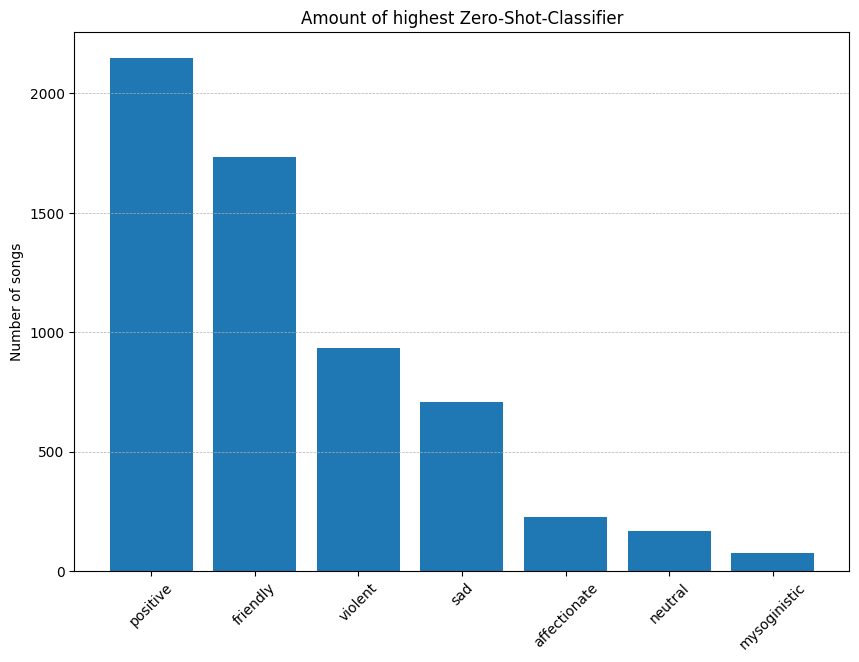

In [64]:
from collections import defaultdict

class_score_dict = defaultdict(int)

for song_temp in dataset:
    if song_temp['total_class_score'] is not None:
        temp_max = max(song_temp['total_class_score'], key=song_temp['total_class_score'].get)
        class_score_dict[temp_max] += 1

class_score_dict = {k: v for k, v in sorted(class_score_dict.items(), key=lambda item: item[1], reverse=True)}

print(class_score_dict)

fig, ax = plt.subplots(1,1, figsize =(10, 7))
ax.bar(range(len(class_score_dict)), class_score_dict.values(), tick_label=list(map(lambda x: zero_shot_mapper[x], class_score_dict.keys())))
plt.xticks(rotation=45)
plt.ylabel("Number of songs")  # add Y-axis label
plt.grid(linestyle = '--', linewidth = 0.5, axis='y')
plt.title('Amount of highest Zero-Shot-Classifier')
plt.savefig('../../data/overall_score_binary_zero_shot'+ '.png')

plt.show()

In [65]:
from collections import Counter

range_temp = list(range(2000, 2024, 4))
class_scores_final_v2 = {year: defaultdict(int) for year in range_temp}

category_list = set()

for year, class_scores in class_score_dict_final.items():
    class_scores_final_v2[year] = Counter(class_scores).most_common(3)
    category_list.update([x[0] for x in Counter(class_scores).most_common(3)])

print(class_scores_final_v2)
print(list(category_list))
print(year_counter)



{2000: [('positiv', 26.87734350390255), ('freundlich', 25.181619351675014), ('gewalttätig', 20.885387774511898)], 2004: [('positiv', 27.020246303574037), ('freundlich', 24.3004289495841), ('gewalttätig', 20.706652764669354)], 2008: [('positiv', 54.157194640924146), ('freundlich', 49.878654648858806), ('gewalttätig', 42.11752373990968)], 2012: [('positiv', 149.63537539360493), ('freundlich', 142.53747962591737), ('gewalttätig', 112.8509171693496)], 2016: [('positiv', 389.3361091480219), ('freundlich', 376.4595976835937), ('liebevoll', 289.24245965997983)], 2020: [('positiv', 369.05380891359056), ('freundlich', 363.0645187831322), ('liebevoll', 268.0452867174989)]}
['liebevoll', 'freundlich', 'positiv', 'gewalttätig']
{2000: 136, 2004: 137, 2008: 278, 2012: 774, 2016: 1962, 2020: 1880}


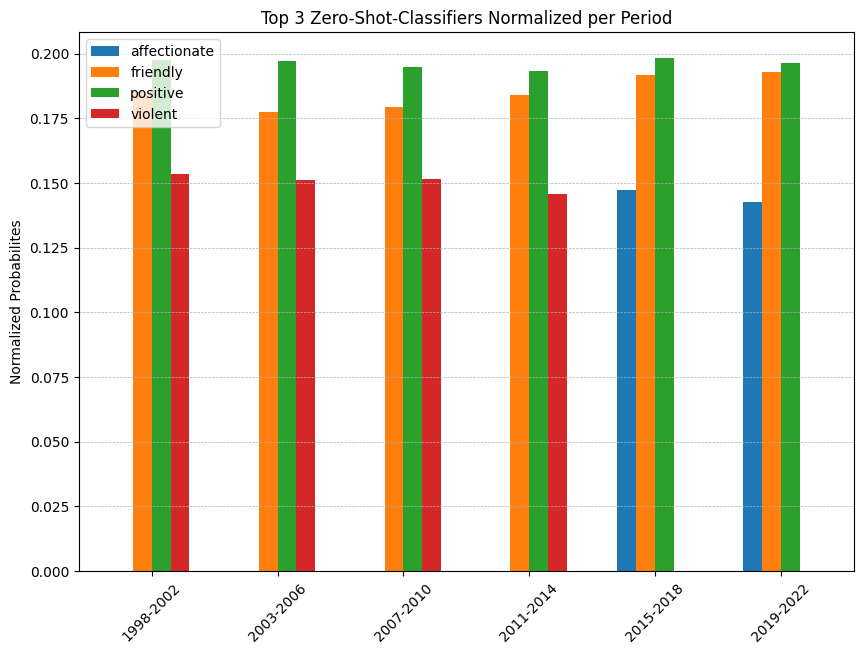

In [66]:
plot_dict = {category: [] for category in list(category_list)}
range_temp = list(range(2000, 2024, 4))


for year, class_scores in class_scores_final_v2.items():
    for item in list(category_list):
        itemIsThere = False
        for x in class_scores:
            if x[0] == item:
                plot_dict[item].append(x[1] / year_counter[year])
                itemIsThere = True
        if not itemIsThere:
            plot_dict[item].append(0)


fig, ax = plt.subplots(1,1, figsize =(10, 7))

width = 0.15
len_val = width
len_val_arr = [-1.5*len_val, -0.5*len_val, 0.5*len_val, 1.5*len_val]
ind = np.arange(len(range_temp))



for index, key in enumerate(plot_dict):
    ax.bar(ind+len_val_arr[index], plot_dict[key], width=width, label=zero_shot_mapper[key])
plt.xticks(ind, ["1998-2002", "2003-2006", "2007-2010", "2011-2014", "2015-2018", "2019-2022"], rotation=45)
plt.ylabel("Normalized Probabilites")  # add Y-axis label
plt.grid(linestyle = '--', linewidth = 0.5, axis='y')
plt.title('Top 3 Zero-Shot-Classifiers Normalized per Period')
plt.legend(loc="upper left")
plt.savefig('../../data/top_3_time_series_zero_shot'+ '.png')

plt.show()

In [67]:
import collections

counting_dict = collections.defaultdict(int)
love_counter = 0
violence_counter = 0
mys_counter = 0

no_label = 0


for song in dataset:
    if len(song['matched_categories'].items()) == 0:
        no_label += 1
    for category, matched_word_dict in song['matched_categories'].items():
        counting_dict[category] += sum([count for word, count in matched_word_dict.items()])
        if category == 'Liebe':
            love_counter += 1
        if category == 'Gewalt':
            violence_counter += 1
        if category == 'Frauenfeindlichkeit':
            mys_counter += 1


for key, value in sorted(counting_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{key} {value}")


print(love_counter)
print(violence_counter)
print(mys_counter)
print(no_label)

Liebe 12098
Gewalt 10251
Frauenfeindlichkeit 9102
Rassismus 2051
Trauer 1294
Homophobie 1253
Behindertenfeindlichkeit 546
Antisemitismus 238
3628
3099
2431
757
